In [3]:
# Importing necessary packages
import numpy as np
import openpyxl as xl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle


In [4]:
# Can only use read_gpickle with nertorkx 2.5
!pip install networkx==2.5

In [5]:
# Importing graph of neurons and synapses as networkx graph from gz file
import networkx as nx
fname = 'db_mli_pc_231209_v2.gz'
G = nx.read_gpickle(fname)

In [7]:
# Prints all nodes in graph
def nodes(graph=G):
    for nid in G.nodes:
        print(f'{nid}: {G.nodes(data=True)[nid]}')
        
# nodes()

In [8]:
# Example on how to get all out edges (synapses)of a neuron
# list(G.out_edges('interneuron_225', data=True))

In [10]:
#print(G.adj['interneuron_81'].keys())

In [7]:
# # Prints connections of neuron (no duplicates)
# nid = 'interneuron_299'
# print(f'postsyn of {nid}: {list(G.successors(nid))}')

In [11]:
# Function to lowercase keys if they contain "interneuron"
def lowercase_keys_containing_interneuron(dictionary):
    updated_dict = {}
    for key, value in dictionary.items():
        
        if type(key) != float and 'nterneuron' in key:
            updated_dict[key.lower()] = value
        else:
            updated_dict[key] = value
    return updated_dict

# Updating cell type database 

# Updating dictionary of cell type from csv file
def update_dict(csv=r'C:\Users\regehr2\HarvardMedProjects\CellTypeDB.csv'):
    #reding csv into pd df
    data = pd.read_csv(csv)
    # drop duplicates
    data.drop_duplicates()
    # Putting the df into dict
    CellType_dict = dict(zip(data['Neuron_ID'], data['Cell Type']))
    # Apply the function to the dictionary
    CellType_dict = lowercase_keys_containing_interneuron(CellType_dict)
    return CellType_dict

CellType_dict = update_dict()
    

In [12]:
# Prints the connections between one neuron and one possible connections. Doesnt return anything just print out
# synapses
def connections(name_neuron, possible_connection, graph=G):
    #Gets list of synanpses name_neuron makes
    connects = list(graph.out_edges(name_neuron, data=True))

    counter = 0
    # loops through list and checks if possible connections is in there and if so prints it
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1
                print(connection)
            
    # If no connections print no connections            
    if (counter == 0):
        print('No connections found between', name_neuron, 'and', 
        possible_connection)
    counter = 0
    
# Same as connections but instead of printing connections, it appends them 
# to a list and returns the connections between one neuron and one possible connections
def connections2(name_neuron, possible_connection, graph=G):
    connects = list(graph.out_edges(name_neuron, data=True))
    ret = []

    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1
#                 print(connection)
                ret.append(connection)
            
                
    
    counter = 0
    return ret

# Prints the number of connections between a neuron
# (name_neuron) and a target neuron (possible_connections)
def numConnections(name_neuron, possible_connection, graph=G):
    
    connects = list(graph.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    # Iterate through each outgoing connection from name_neuron
    # Check if the target neuron of the connection matches possible_connection
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1        
    # Print the result
    print("Number of connections from", name_neuron, "to", possible_connection, ":", counter)
            
# Same thing as numConnections but returns result instead of printingit.       
def numConnections2(name_neuron, possible_connection, graph=G):

    connects = list(graph.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    # Iterate through each outgoing connection from name_neuron
    # Check if the target neuron of the connection matches possible_connection
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1        
    return counter
                    
        
# Prints all connections between each neuron in a list of
# neurons and a certain other neuron (connect). Also prints # of connections are between the two    
def check_all_connects(neurons, connect):
    #iterate though list and run connections
    for neuron in neurons:
        connections(neuron, connect)
        print("")
        
    for neuron in neurons:
        numConnections(neuron, connect)


In [15]:
# Check all connections in networkx graph to one neuron. You can filter what celltype it is. Neuron is target,
# filter_list is what you want to filter, sub is the cell type you want to filter for.
def all_connections_to(neuron, filter_list=False, sub='', graph=G):
    # all in edges
    connects =list(graph.in_edges(neuron, data=True))
    CellType_dict =  update_dict()  # Updating cellType dict
    if filter_list:
        # filters for grcs if sub is grc
        if sub == 'grc':
            
            connects = [connection for connection in connects if sub
                    in connection[0]]
        # filteres for whatever sub is and also takes into account cell_type due to the nid not being directly
        # representative of cell type
        else:   
            connects = [connection for connection in connects if sub.lower().replace(" ", "")
                        in CellType_dict.get(connection[0], '').lower().replace(" ", "")]
    print('Number of connections to', neuron, ':', len(connects))
        
    return connects
            
# Check all connections in networkx graph to one neuron. You can filter what celltype it is. Neuron is target,
# filter_list is what you want to filter, sub is the cell type you want to filter for. Same as all_connections_to
# but has condition where int has to be in nid
def all_connections_to2(neuron, filter_list=False, sub='', graph=G):
    connects = list(graph.in_edges(neuron, data=True))
    CellType_dict = update_dict()
    if filter_list:
        # filters for grcs if sub is grc
        if sub == 'grc':
            
            connects = [connection for connection in connects if sub
                    in connection[0]]
        # filteres for whatever sub is and also takes into account cell_type due to the nid not being directly
        # representative of cell type
        else:   
            connects = [connection for connection in connects if (sub.lower().replace(" ", "")
                        in CellType_dict.get(connection[0], '').lower().replace(" ", "") and 'int' in connection[0])]
    print('Number of connections to', neuron, ':', len(connects))

        
    return connects
            
    

In [14]:
# Example filtering out in edges
# all_connections_to('pc_50', True, 'mli')

In [13]:
neurons = ['interneuron_191',
'interneuron_188',
'interneuron_99',
'interneuron_173',
'interneuron_179',
'interneuron_178',
'interneuron_134',
'interneuron_185',
'interneuron_131',
'interneuron_95',
'interneuron_116',
'interneuron_177',
'interneuron_126'
]

In [13]:
# Example of check_all_connects
# check_all_connects(neurons, 'pc_16')

In [15]:
# returns true or false if there is a connections between name_neuron and possible_connection
def bool_check_connects(name_neuron, possible_connection, graph=G):
    ret = False
    # out edges of pre_syn target
    connects = list(graph.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    # Goes through out edges of name_neuron and sees if there are any connections to possible_connection
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1                      
    if (counter > 0):
        ret = True
    return ret

# print(bool_check_connects('interneuron_188', 'pc_16'))

In [16]:
# This Checks if given name(nid) is a string or a list and handles writing any two cells if they have 
# no connection to xl file.
def list_or_string_no_connection(name, sheet, possible_connection, row):
    if isinstance(name, str):
    # If name_neuron is a single string and there are no connections it prints out no connection
    # in xl for just those cells
        if not bool_check_connects(name, possible_connection):
            sheet.cell(row=row, column=1, value=name)
            sheet.cell(row=row, column=2, value=possible_connection)
            sheet.cell(row=row, column=3, value='No Connection')
            sheet.cell(row=row, column=4, value='No Connection')
            row += 1
            return row
    else:
        # If name_neuron is a list of strings then print out all non connections from list to target
        for n in name:
            if not bool_check_connects(n, possible_connection):
                sheet.cell(row=row, column=1, value=n)
                sheet.cell(row=row, column=2, value=possible_connection)
                sheet.cell(row=row, column=3, value='No Connection')
                sheet.cell(row=row, column=4, value='No Connection')
                sheet.cell(row=row, column=5, value=CellType_dict.get(n))
                row += 1
    return row
    

In [17]:
# Opens an excel file and writes all the wanted data from connections
# name neuron is list or single cell that is pre-syn, possible connections is post-syn target
def automate_connections_id(name_neuron, possible_connection, xl_file_path, graph=G, col_number=1):
    # updates cell types
    CellType_dict = update_dict()
    
    # Activates spreadsheet and deletes anything that was already there.
    # Sets row, col, gets list of all connections
    
    # excel_file_path = r'C:\Users\regehr2\Downloads\test-book.xlsx'
    workbook = xl.load_workbook(xl_file_path)
    row_number = 1
    # out edges for pre-syn neuron
    connects = list(graph.out_edges(name_neuron, data=True))
    sheet = workbook.active
    sheet.delete_cols(1, sheet.max_row)
    sheet.delete_cols(2, sheet.max_row)
    sheet.delete_cols(3, sheet.max_row)
    sheet.delete_cols(4, sheet.max_row)
    # Title row
    sheet.cell(row=row_number, column=1, value='Neuron_ID')
    sheet.cell(row=row_number, column=2, value='Connection')
    sheet.cell(row=row_number, column=3, value='Coords of Synapse')
    sheet.cell(row=row_number, column=4, value='Area')
    sheet.cell(row=row_number, column=5, value='Cell Type')
    row_number += 1
    
    # Goes through all neurons with no connection to possible_connection and writes no connection in 
    # spreadsheet
    row_number = list_or_string_no_connection(name_neuron, sheet, possible_connection, row_number)
    
    
    # Goes through list of connections of input(s) and filters out non wanted connections then
    # writes it to sheet
    for connection in connects: 
        if (connection[1] == possible_connection):
                sheet.cell(row=row_number, column=col_number, value=connection[0])
                sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
                sheet.cell(row=row_number, column=col_number, value=connection[0])
                sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
                it = iter(connection[2].values())
                coord_str, area = str(next(iter(it))), next(iter(it))
                coord = coord_str.strip('(').strip(')')
                sheet.cell(row=row_number, column=col_number + 2, value=coord)
                sheet.cell(row=row_number, column=col_number + 3, value=area)
                c_type = CellType_dict.get(connection[0])
               
                sheet.cell(row=row_number, column=col_number + 4, value=c_type)
                
                

                row_number += 1
       
    # save workbook
    workbook.save(xl_file_path)


In [19]:
# Goes through a list of neurons and writes all data from connections to each of those possible connections
# to a given xl sheet path
def automated_connections_list(loNeurons, wanted_connection, xl_path):
#     for neuron in loNeurons:
        automate_connections_id(loNeurons, wanted_connection, xl_path)
        

In [20]:
# Testing if automate_connections_id works
# automate_connections_id('interneuron_191', 'pc_16', r'C:\Users\regehr2\Downloads\test-book.xlsx')

In [21]:
# Testing if automated_connections_list
# automated_connections_list(neurons,'pc_16', r'C:\Users\regehr2\Downloads\test-book.xlsx')

#  Visualizing pc_16 connections

   Cell Type  Connections
0       MLI2            0
1       MLI1           12
2       MLI2            1
3       MLI2            1
4       MLI2            0
5       MLI2            8
6       MLI2            2
7       MLI1            7
8       MLI2            0
9       MLI2            0
10      MLI1           24
11      MLI1           29
12      MLI1            0


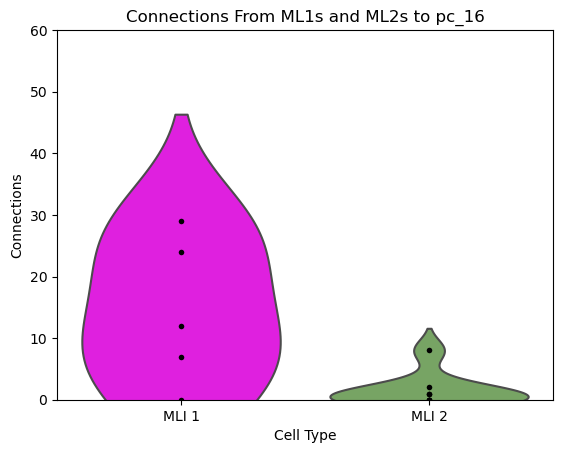

In [22]:
# Returns type of cell and number of times it connects with possible_connection. Name neuron has to be str
def put_num_connections_df_helper(name_neuron, possible_connection, graph=G):
    CellType_dict = update_dict()
    # all out edges for name_neuron
    connects = list(graph.out_edges(name_neuron, data=True))
    counter = 0
    type_num = []
    # goes through connections and check how many times it synapses onto target cell.
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1   
    #returns cell type and number of connections
    type_num = [CellType_dict.get(name_neuron), counter]
    return type_num
    

# put_num_connections_df_helper('interneuron_177', 'pc_16')

# Puts the number of MLI1 vs MLI2 connections of a list of neurons to another neuron and creates a violin plot.
# col1 and col2 used to name columns in df which is then used to plot data
def put_num_connections_df_violin(neurons, possible_connection, col1, col2):
    # uupdate cell type dict
    CellType_dict = update_dict()
    # columns of df
    columns = [col1, col2]
    whole_list = []
    single_list = []
    index = [0] * len(neurons)
    
    # puts all individual connection counts into a larger list
    for i, neuron in enumerate(neurons):
        single_list = put_num_connections_df_helper(neuron, possible_connection)
        index[i] = i
        whole_list.append(single_list)
    
    #puts whole_list into a pandas df
    df = pd.DataFrame(whole_list, columns=columns, index=index)# #     df = pd.DataFrame(whole_dict)
    print(df)

    df.loc[df['Cell Type'] == 'MLI1', 'Cell Type'] = 'MLI 1'
    df.loc[df['Cell Type'] == 'MLI2', 'Cell Type'] = 'MLI 2'
    # Apply the function to the specified column
    
    
    df = df.sort_values(by=['Cell Type'])
    # wanted colors for cell types
    colors = {'MLI 2' : '#73AF59', 'MLI 1' : '#FF00FF'}
    
    # Creating violin plot
    sns.violinplot(x=col1, y=col2, data=df,  inner=None, palette=colors, scale='width')
    sns.stripplot(x=col1, y=col2, data=df, color='black', size=4, jitter=False)
    plt.title('Connections From ML1s and ML2s to '+ possible_connection )
    plt.ylim(0, 60)
    
    plt.show()



# put_num_connections_df_violin(neurons, 'pc_16', 'Cell Type', 'Connections')
    

# Interneuron Connections onto pc_35

In [23]:
neuron_connections_pc35 = ['interneuron_258',
'interneuron_298',
'interneuron_276',
'interneuron_299',
'interneuron_38',
'interneuron_269',
'interneuron_284',
'interneuron_43'
]

In [2]:
# check_all_connects(neuron_connections_pc35, 'pc_35')

In [24]:
# Write data to spreadsheet to copy to main google sheets
#automated_connections_list(neuron_connections_pc35,'pc_35', r'C:\Users\regehr2\Downloads\test-book.xlsx')

# Visualizing Connections onto PC_35

Make sure to update the dictionary/df

In [6]:
# Visualize contacts onto pc_35
# put_num_connections_df_violin(neuron_connections_pc35, 'pc_35', 'Cell Type', 'Connections')

# Interneuron Connections onto pc_50

In [50]:
neuron_connections_pc50 = ['interneuron_253',
'interneuron_87',
'interneuron_140'
]

In [5]:
# check_all_connects(neuron_connections_pc50, 'pc_50')

In [52]:
#automated_connections_list(neuron_connections_pc50,'pc_50', r'C:\Users\regehr2\Downloads\test-book.xlsx')

# Visualizing connections onto pc_50

In [3]:
# put_num_connections_df_violin(neuron_connections_pc50, 'pc_50', 'Cell Type', 'Connections')

# Interneuron Connections onto pc_10

In [55]:
neuron_connections_pc10 = ['interneuron_167',
'interneuron_160',
'interneuron_157',
'interneuron_169',
'interneuron_256'
]

In [7]:
# check_all_connects(neuron_connections_pc10, 'pc_10')

In [8]:
# automated_connections_list(neuron_connections_pc10,'pc_10', r'C:\Users\regehr2\Downloads\test-book.xlsx')

# Visualizing Connections Onto pc_10

In [9]:
# put_num_connections_df_violin(neuron_connections_pc10, 'pc_10', 'Cell Type', 'Connections')